\newpage

In [135]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### **1. Classification Problem Identification**

Dataset is used from the [Early Stage of Indians Chronic Kidney Disease (CKD)](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease) project, which comprises data on 250 early-stage CKD patients and 150 healthy controls.

In this assignment, machine learning (ML) techniques have been deployed to predict, diagnose, and treat chronic kidney disease (CKD). 

In [136]:
## Load Dataset
data_url = 'https://archive.ics.uci.edu/static/public/336/data.csv'
df = pd.read_csv(data_url)
df.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd


In [137]:
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
# metadata 
print(chronic_kidney_disease.metadata) 

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [138]:
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 

In [139]:
# Features
X.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no


In [140]:
# Target
y.head(2)

,class
0,ckd
1,ckd


The classification problem is determining whether a patient has early-stage CKD based on various medical measurements included in the dataset. There are two classes here: Early-stage Indian CKD patients and Healthy patients.

### **2. Variable Transformation**

In [141]:
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

From the dictionary， `sg`, `al`, `su` are Categorical variables. `age`, `bp`, `bgr`, `bu`, `sod`, `pcv`, `wbcc` are Integer variable. `rbc`, `pc`, `pcc`, `ba`, `htn`, `dm`, `cad`, `appet`, `pe`, `ane`, `class` are Binary variables. `sc`,`pot`,`hemo`,and `rbcc` are continuous varibles. Then, we need to transform `sg`, `al`, `su` into Categorical variables and those binary variables into float (0,1).

In [142]:
# Cat transformation
columns_cat = ['sg', 'al', 'su']
for col in columns_cat:
    df[col] = pd.Categorical(df[col])

# Binary trans
columns_bin = ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','class']
mapping = {'normal': 1, 'present': 1, 'abnormal': 0, 'notpresent': 0, 'yes':1,'no':0,'good':1,'poor':0,'ckd':1,'notckd':0}

for column in columns_bin:
    df[column] = df[column].map(mapping).astype(float)
df.head(3)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.02,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.02,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.01,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [143]:
for col in columns_cat:
    print(df[col].value_counts(normalize=True))

sg
1.020    0.300283
1.010    0.237960
1.025    0.229462
1.015    0.212465
1.005    0.019830
Name: proportion, dtype: float64
al
0.0    0.562147
1.0    0.124294
2.0    0.121469
3.0    0.121469
4.0    0.067797
5.0    0.002825
Name: proportion, dtype: float64
su
0.0    0.826211
2.0    0.051282
3.0    0.039886
1.0    0.037037
4.0    0.037037
5.0    0.008547
Name: proportion, dtype: float64


In general, we do not need to convert binary variables. Since the classification algorithm is sensitive to the scale of the data, we choose to standardize those data under integer and continuous variable.

### **3. Dataset Overview**

In [144]:
df.describe(include='all')

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,391.000000,388.000000,353.00,354.0,351.0,248.000000,335.000000,396.000000,396.000000,356.000000,...,329.000000,294.000000,269.000000,398.000000,397.000000,398.000000,399.000000,399.000000,399.000000,398.000000
unique,NaN,NaN,5.00,6.0,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,1.02,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,106.00,199.0,290.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,51.483376,76.469072,NaN,NaN,NaN,0.810484,0.773134,0.106061,0.055556,148.036517,...,38.884498,8406.122449,4.707435,0.369347,0.345088,0.085427,0.794486,0.190476,0.150376,0.623116
std,17.169714,13.683637,NaN,NaN,NaN,0.392711,0.419431,0.308305,0.229351,79.281714,...,8.990105,2944.474190,1.025323,0.483235,0.475997,0.279868,0.404584,0.393170,0.357888,0.485216
min,2.000000,50.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,99.000000,...,32.000000,6500.000000,3.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,121.000000,...,40.000000,8000.000000,4.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,163.000000,...,45.000000,9800.000000,5.400000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000


In [145]:
# Observations count
print(df.shape)
# type check
df.dtypes

(400, 25)


age       float64
bp        float64
sg       category
al       category
su       category
rbc       float64
pc        float64
pcc       float64
ba        float64
bgr       float64
bu        float64
sc        float64
sod       float64
pot       float64
hemo      float64
pcv       float64
wbcc      float64
rbcc      float64
htn       float64
dm        float64
cad       float64
appet     float64
pe        float64
ane       float64
class     float64
dtype: object

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bp'}>,
        <Axes: title={'center': 'bgr'}>],
       [<Axes: title={'center': 'bu'}>, <Axes: title={'center': 'sod'}>,
        <Axes: title={'center': 'pcv'}>],
       [<Axes: title={'center': 'wbcc'}>, <Axes: title={'center': 'sc'}>,
        <Axes: title={'center': 'pot'}>],
       [<Axes: title={'center': 'hemo'}>,
        <Axes: title={'center': 'rbcc'}>, <Axes: >]], dtype=object)

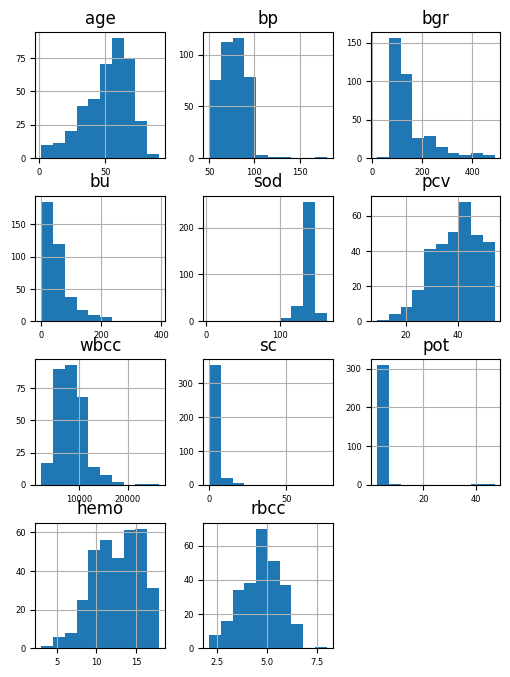

In [146]:
## Check the distribution of each variable
num_col = ['age','bp','bgr','bu','sod','pcv','wbcc','sc','pot','hemo','rbcc']

df[num_col].hist(xlabelsize=6,ylabelsize=6,figsize=(6,8))

There are 400 observations and 25 variables in the dataset. After the transformation in Part 2. `sg`, `al`, `su` are Categorical variables now. `age`, `bp`, `bgr`, `bu`, `sod`, `pcv`, `wbcc`,`sc`,`pot`,`hemo`,and `rbcc` variables are all of type float. The rest of the variables are object(in this case Binary).

According to the data summary, the mean of observations under the `age` variable was about 51.48. The maximum and minimum age are 90 and 2 respectively, respectively. Also, the mean of `bp` (blood pressure) is about 76.47. But there may be some missing values and outliers in the dataset based on the data summary.

Also, we can find that most of them have the skewness problem by looking at the distribution of observations under each variable. So, this implies that there exist a lot of missing values and outliers in our dataset.

### **4. Association Between Variables**

Create a heatmap to find potential relationship between variables.

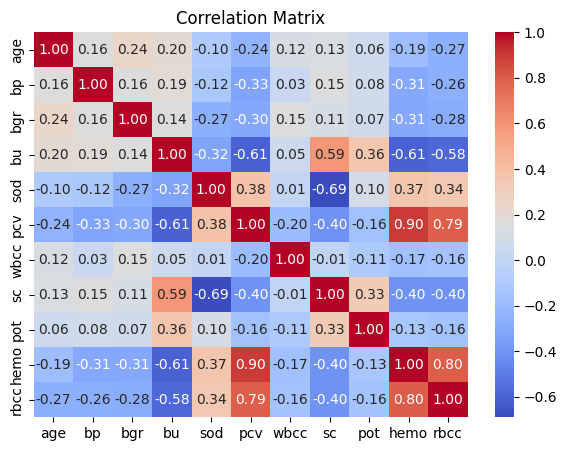

In [147]:
num_col = ['age','bp','bgr','bu','sod','pcv','wbcc','sc','pot','hemo','rbcc']

# Compute the correlation matrix
correlation_matrix = df[num_col].corr()

# Plot the correlation matrix
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Variables `sc` (serum creatinine) and `hemo` (hemoglobin) have a strong negative correlation (-0.61), suggesting that as serum creatinine levels increase, hemoglobin levels tend to decrease.

`pcv` (packed cell volume) and `hemo` (hemoglobin) show a strong positive correlation (0.90). This indicates that when the Packed cell volume rises, the amount of Hemoglbin will also increase. This may be because both are related to the blood's ability to carry oxygen.

`sod` (sodium) appears to have a moderate negative correlation with `bu` (blood urea) and `sc` (serum creatinine), which might suggest that higher levels of urea and creatinine in the blood are associated with lower sodium levels.

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

df_cleaned = df[num_col].dropna()
vals = [VIF(df_cleaned, i)
        for i in range(1, df_cleaned.shape[1])]
vif = pd.DataFrame({'vif':vals}, index=df_cleaned.columns[1:])
vif

,vif
bp,33.314145
bgr,5.228453
bu,10.308152
sod,154.643905
pcv,106.157383
wbcc,10.830481
sc,7.157653
pot,3.696926
hemo,110.751640
rbcc,63.753595


From variance inflation factor, `sod`, `pcv` and `hemo` have extremely large value, this indicates that they have severe multicollinearity issues. To solve this problem, Ridge Regression/ PCA or LASSO will be applied in the next part. 

### **5. Missing Value Analysis and Handling**

In [149]:
## Check the missing vlaue
df.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         3
cad        2
appet      1
pe         1
ane        1
class      2
dtype: int64

In [150]:
print(df.shape)

## Drop the missing values
df_dropna = df.dropna()
print(df_dropna.shape)


(400, 25)
(158, 25)


Based on the distribution of observed values for each variable in the dataset overview, we need to replace in those missing values in different ways. If the distribution is approximately normal, we choose to replace it with mean. If there is a skewness, we need to replace it in with median.

So, for `age`, `pcv`, `rbcc` variables. We choose to replace their missing values with mean. For the missing observations in the remaining variables, we replace them with median

In [151]:
columns_cat = ['sg', 'al', 'su']

for col in columns_cat:
    df[col] = pd.to_numeric(df[col])

In [152]:
#| warning: false
mean_col = ['age','pcv','rbcc']
median_col = ['bp','bgr','bu','sod','wbcc','sc','pot','hemo']
columns_bin = ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','class']
columns_cat = ['sg', 'al', 'su']

for column in mean_col:
    df[column].fillna(df[column].mean(), inplace=True)

for column in median_col:
    df[column].fillna(df[column].median(), inplace=True)

for column in columns_bin:
    df[column].fillna(df[column].median(), inplace=True)

for column in columns_cat:
    df[column].fillna(df[column].median(), inplace=True)

/var/folders/s7/cy35n2j57dn3t2wdhwg0k6m80000gn/T/ipykernel_68593/2128223267.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
/var/folders/s7/cy35n2j57dn3t2wdhwg0k6m80000gn/T/ipykernel_68593/2128223267.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [153]:
columns_cat = ['sg', 'al', 'su']
for col in columns_cat:
    df[col] = pd.Categorical(df[col])

for col in columns_bin:
    df[col] = pd.Categorical(df[col])

In [154]:
df.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,121.0,...,38.0,6000.0,4.707435,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,4.707435,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,60.0,90.0,1.015,3.0,0.0,1.0,1.0,0.0,0.0,74.0,...,39.0,7800.0,4.400000,1.0,1.0,0.0,1.0,1.0,0.0,1.0
6,68.0,70.0,1.010,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,36.0,8000.0,4.707435,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,24.0,80.0,1.015,2.0,4.0,1.0,0.0,0.0,0.0,410.0,...,44.0,6900.0,5.000000,0.0,1.0,0.0,1.0,1.0,0.0,1.0
8,52.0,100.0,1.015,3.0,0.0,1.0,0.0,1.0,0.0,138.0,...,33.0,9600.0,4.000000,1.0,1.0,0.0,1.0,0.0,1.0,1.0
9,53.0,90.0,1.020,2.0,0.0,0.0,0.0,1.0,0.0,70.0,...,29.0,12100.0,3.700000,1.0,1.0,0.0,0.0,0.0,1.0,1.0


In [155]:
df.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

### **6. Outlier Analysis**

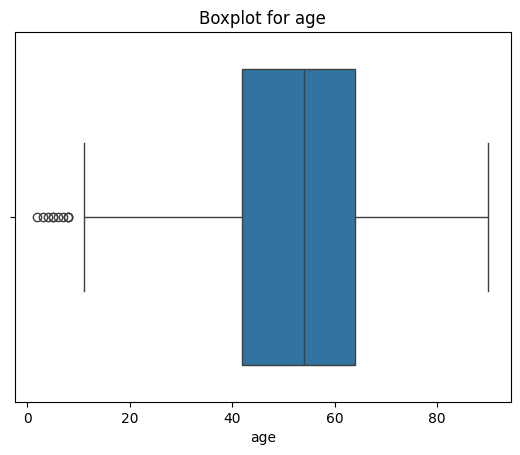

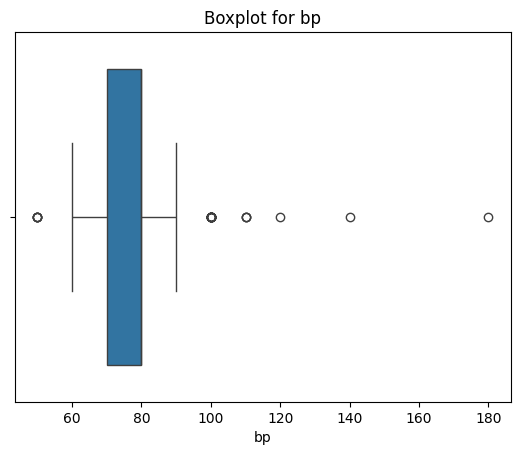

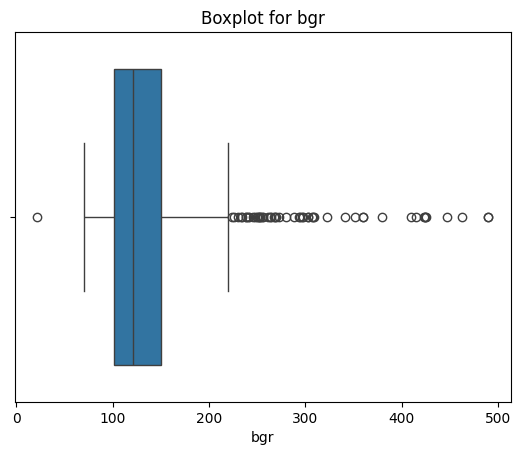

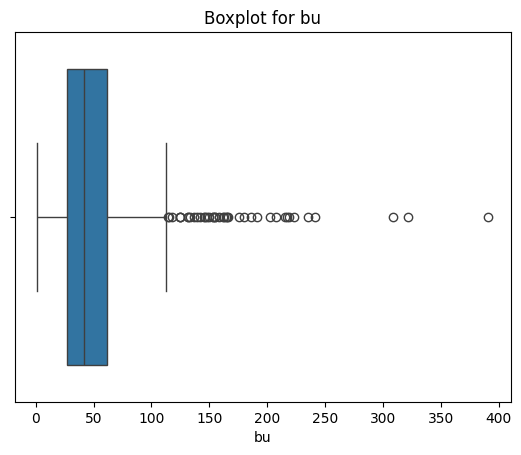

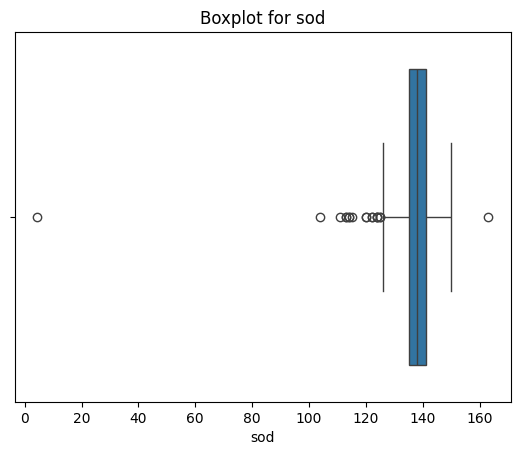

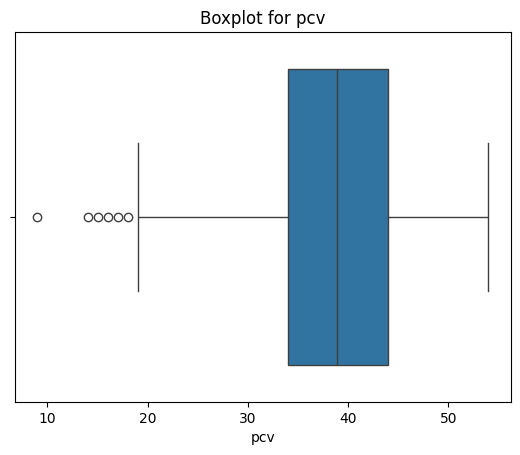

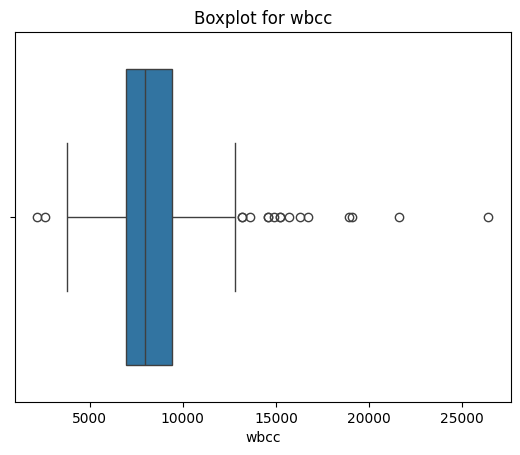

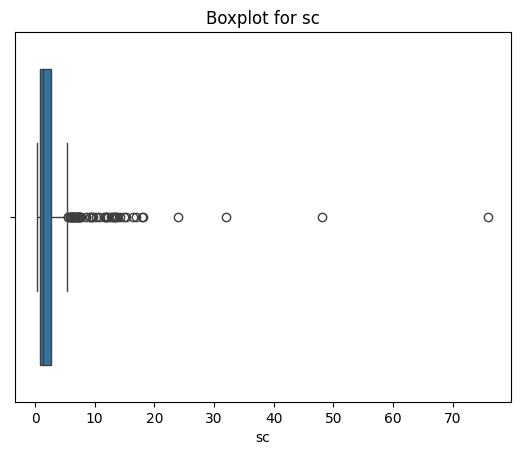

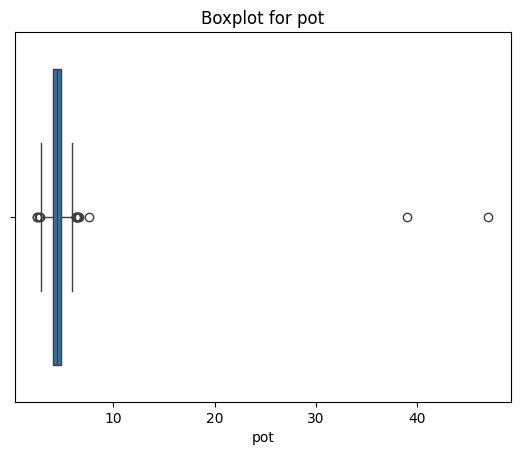

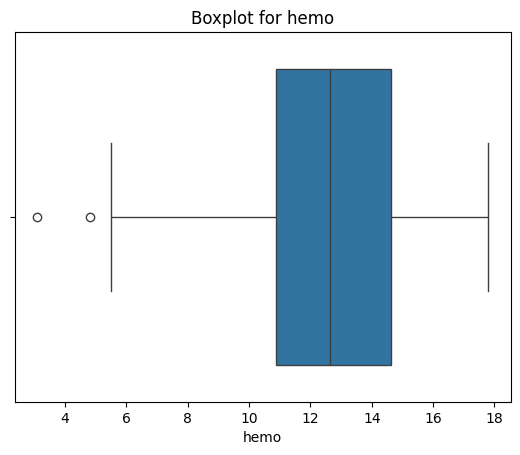

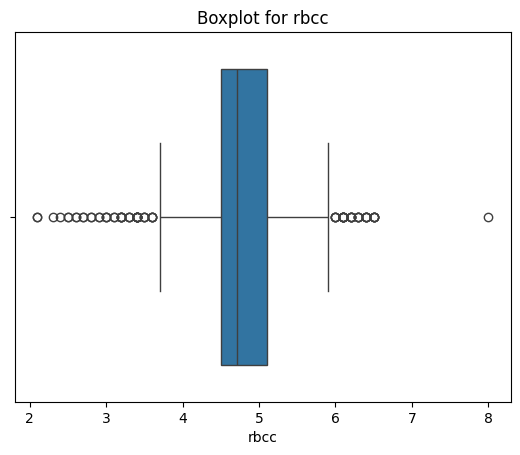

In [156]:
for column in df[num_col].columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [157]:
from sklearn.preprocessing import scale

In [158]:
for column in df[num_col].columns:
    # Q3
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    # Max val
    max_val = df[column].max()
    # .95
    np.quantile(df[column], 0.95)
    # outlier threshold
    threshold_max = Q3 + 1.5 * (Q3 - df[column].quantile(0.25))
    threshold_min = Q1 - 1.5 * (Q3 - df[column].quantile(0.25))
    # replace outlier with 95%
    df[column] = np.where(
        df[column] > threshold_max, 
        threshold_max, 
        df[column]
        )
    
    df[column] = np.where(
        df[column] < threshold_min, 
        threshold_min, 
        df[column]
        )


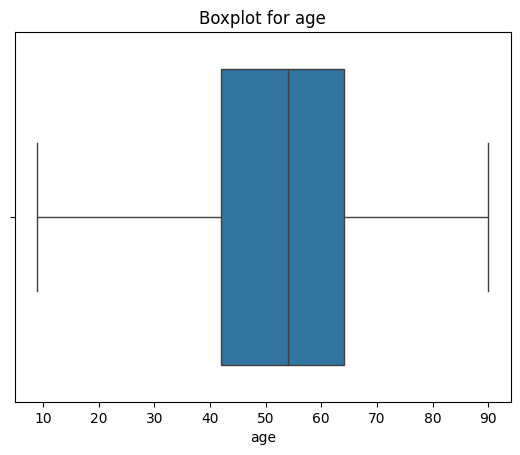

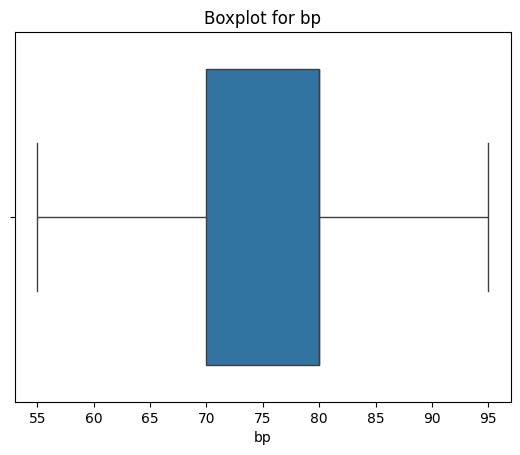

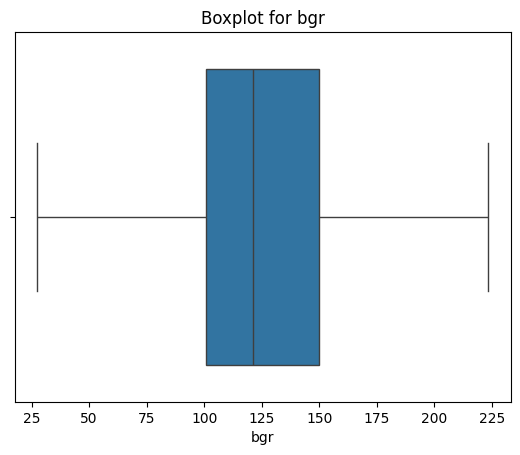

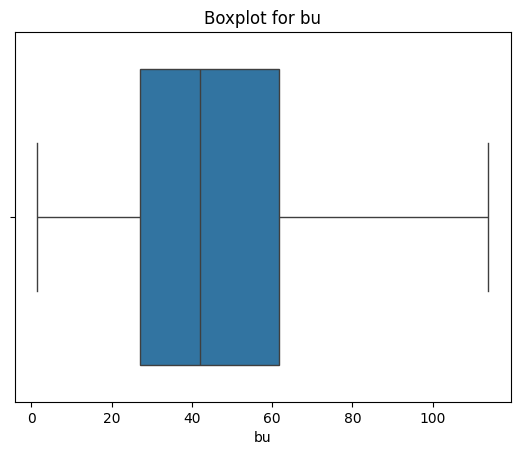

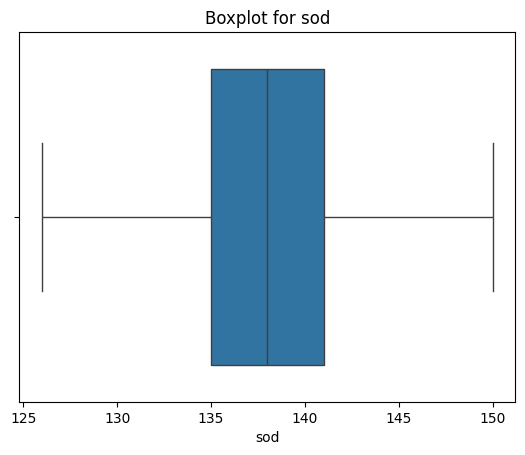

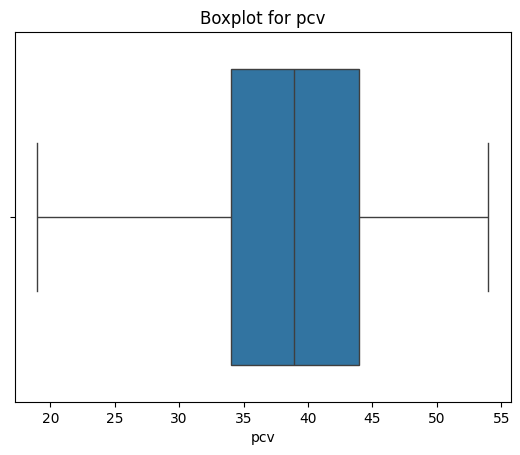

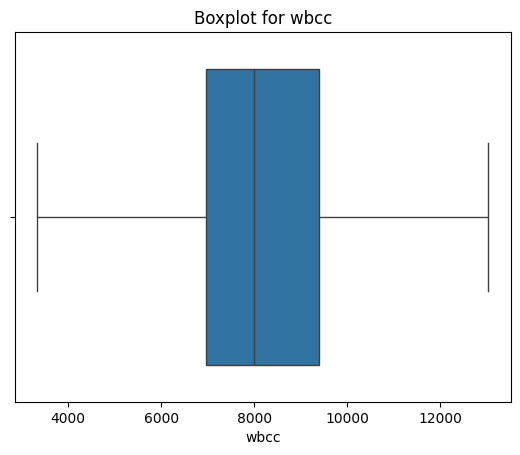

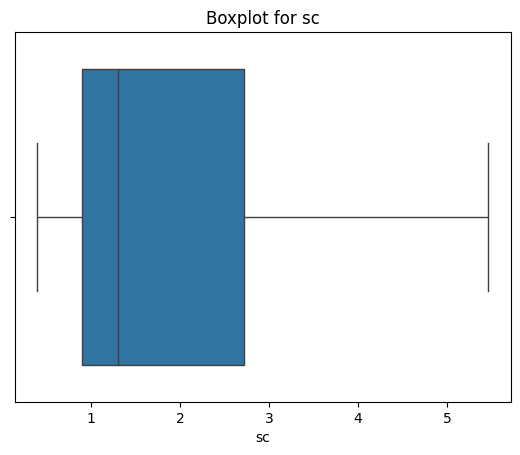

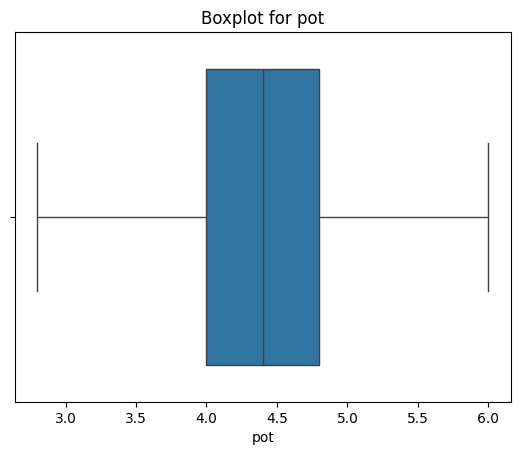

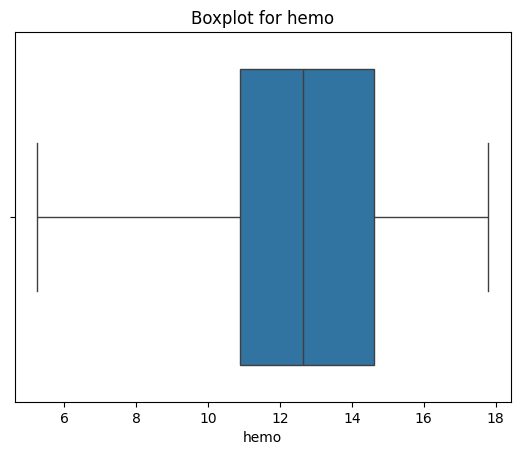

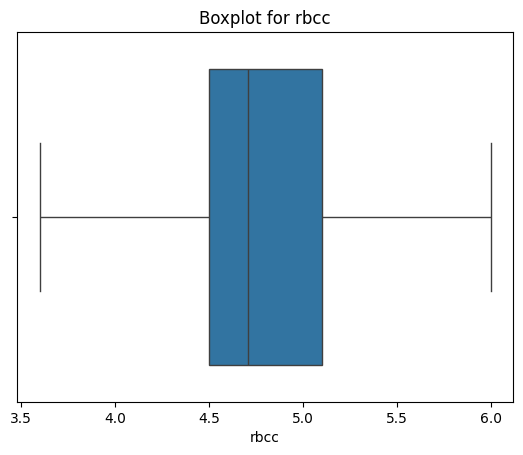

In [159]:
for column in df[num_col].columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

For the rest of the outliers we remove them .

### **7. Sub-group Analysis**

In [160]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis

In [161]:
df[num_col].mean()

age       51.568376
bp        75.825000
bgr      134.011250
bu        50.277687
sod      138.217500
pcv       38.946998
wbcc    8169.093750
sc         2.071406
pot        4.382750
hemo      12.549000
rbcc       4.739435
dtype: float64

In [162]:
df[num_col].var()

age     2.805060e+02
bp      1.203703e+02
bgr     2.124512e+03
bu      9.171178e+02
sod     2.780972e+01
pcv     6.355595e+01
wbcc    4.123827e+06
sc      2.659236e+00
pot     4.035864e-01
hemo    7.272142e+00
rbcc    4.554516e-01
dtype: float64

for numial mean and variance, they have huge difference. Hence we need to applied PCA

We must scale all variable before performing PCA, otherwise the principal components would be driven by the `bu` variable, since it has by far the largest mean and variance.

In [163]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [164]:
df.dtypes

age       float64
bp        float64
sg       category
al       category
su       category
rbc      category
pc       category
pcc      category
ba       category
bgr       float64
bu        float64
sc        float64
sod       float64
pot       float64
hemo      float64
pcv       float64
wbcc      float64
rbcc      float64
htn      category
dm       category
cad      category
appet    category
pe       category
ane      category
class    category
dtype: object

In [165]:
scaler = StandardScaler()
df[num_col] = scaler.fit_transform(
    df[num_col]
)

X = pd.DataFrame(df, index=df.index, columns=df.columns)
X = df.drop(columns='class')

In [166]:
X.head(3)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,-0.213326,0.381013,1.02,1.0,0.0,1.0,1.0,0.0,0.0,-0.282640,...,1.058546,0.634622,-0.181983,0.683303,1.0,1.0,0.0,1.0,0.0,0.0
1,-2.544835,-1.900504,1.02,4.0,0.0,1.0,1.0,0.0,0.0,-0.282640,...,-0.463740,-0.118936,-1.069478,-0.047476,0.0,0.0,0.0,1.0,0.0,0.0
2,0.623626,0.381013,1.01,2.0,3.0,1.0,1.0,0.0,0.0,1.943938,...,-1.094932,-0.998087,-0.329898,-0.047476,0.0,1.0,0.0,0.0,0.0,1.0


In [167]:
# X.var()

all variables variance almost equal to 1, profomance is good

In [168]:
pca_X = PCA()

In [169]:
pc_scores = pd.DataFrame(pca_X.fit_transform(X), columns=X.columns, index=X.index)
pc_scores.head(3)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,-1.125512,0.219512,0.087501,0.432308,0.199319,-0.296985,-0.628805,0.100868,0.555595,-0.179754,...,-0.725845,0.585694,-0.072362,-0.209815,-0.212041,-0.031002,-0.023659,-0.073836,0.060574,-0.000499
1,-0.211117,-0.231368,3.833405,2.337527,-0.298878,0.650752,0.681665,-0.808775,-0.608468,-0.221466,...,-0.443049,-0.419959,-0.192604,-0.211853,0.159069,0.056653,-0.038995,-0.054551,-0.165200,0.004422
2,2.266950,2.412920,-0.573040,0.812566,0.700742,0.114930,0.594379,-0.307882,-0.676141,0.123624,...,0.228477,-0.907974,-0.683296,-0.508890,-0.490741,0.249481,0.279629,-0.172667,-0.086077,-0.003876


In [170]:
pc_scores.var()

age      5.551419
bp       1.580995
sg       1.295468
al       1.036802
su       0.932681
rbc      0.866050
pc       0.758986
pcc      0.673745
ba       0.551874
bgr      0.418770
bu       0.338726
sc       0.176468
sod      0.166425
pot      0.149587
hemo     0.137925
pcv      0.102899
wbcc     0.100356
rbcc     0.091155
htn      0.078170
dm       0.073926
cad      0.056426
appet    0.042267
pe       0.039247
ane      0.000017
dtype: float64

use first 4 for their eigenvalue > 1

In [171]:
np.sqrt(pca_X.explained_variance_)

array([2.35614503, 1.25737623, 1.13818627, 1.01823498, 0.96575417,
       0.93061788, 0.87119825, 0.82081999, 0.74288198, 0.64712479,
       0.58200134, 0.42008121, 0.40795162, 0.38676487, 0.37138212,
       0.32077893, 0.31679067, 0.30191877, 0.27958979, 0.27189428,
       0.23754168, 0.20559048, 0.19810969, 0.00409626])

In [172]:
pca_X.explained_variance_

array([5.55141940e+00, 1.58099497e+00, 1.29546799e+00, 1.03680247e+00,
       9.32681119e-01, 8.66049631e-01, 7.58986387e-01, 6.73745458e-01,
       5.51873642e-01, 4.18770488e-01, 3.38725561e-01, 1.76468223e-01,
       1.66424521e-01, 1.49587068e-01, 1.37924679e-01, 1.02899123e-01,
       1.00356326e-01, 9.11549453e-02, 7.81704515e-02, 7.39264980e-02,
       5.64260486e-02, 4.22674443e-02, 3.92474492e-02, 1.67793288e-05])

In [173]:
pca_X.explained_variance_ratio_

array([3.64735766e-01, 1.03873509e-01, 8.51140001e-02, 6.81193250e-02,
       6.12784116e-02, 5.69006327e-02, 4.98664326e-02, 4.42659883e-02,
       3.62588450e-02, 2.75137877e-02, 2.22547277e-02, 1.15942011e-02,
       1.09343162e-02, 9.82807280e-03, 9.06183807e-03, 6.76061164e-03,
       6.59354639e-03, 5.98900325e-03, 5.13590444e-03, 4.85707096e-03,
       3.70726774e-03, 2.77702828e-03, 2.57861052e-03, 1.10242461e-06])

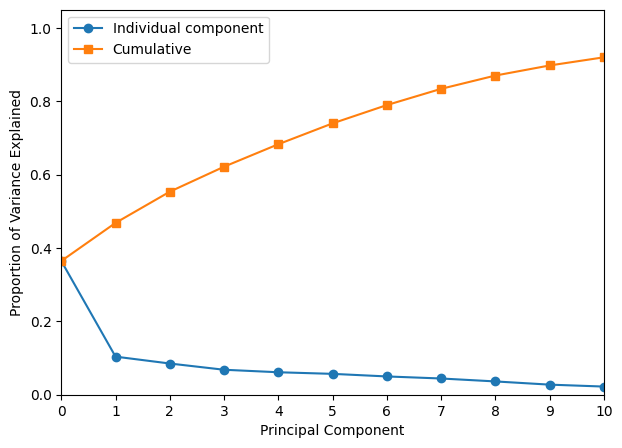

In [174]:
plt.figure(figsize=(7,5))

plt.plot(pca_X.explained_variance_ratio_, '-o', label='Individual component')
plt.plot( np.cumsum(pca_X.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.legend(loc=2);

In [175]:
pca_X = PCA(n_components=4)
pca_loadings = pd.DataFrame(pca_X.fit(X).components_.T, 
                            index=X.columns, 
                           )
pca_loadings

,0,1,2,3
age,0.145662,0.167313,-0.466541,-0.294899
bp,0.155942,0.008571,-0.286551,0.075144
sg,-0.001319,-0.000639,-0.000750,0.000336
al,0.388382,0.198109,0.607745,0.370144
su,0.167564,0.617158,-0.145244,0.182257
rbc,-0.048813,0.001846,-0.052966,-0.043196
pc,-0.089040,-0.020106,-0.082770,-0.054593
pcc,0.049617,0.028808,0.046151,0.011228
ba,0.028943,0.010095,0.035156,0.023526
bgr,0.216315,0.488383,-0.184521,0.080912


In [176]:
# To determine the proportion of the total variance in the original dataset
# We can do explained_variance_ratio_
pca_X.explained_variance_ratio_

array([0.36473577, 0.10387351, 0.085114  , 0.06811933])

In [177]:
print(pca_X.explained_variance_ratio_.sum())

0.6218426004821187


### **8. Data Splitting**

In [178]:
from sklearn.model_selection import train_test_split

In [182]:
# Check the location of the first 4 in order to scale
pc_scores.iloc[:, :4].head(3)

,age,bp,sg,al
0,-1.125512,0.219512,0.087501,0.432308
1,-0.211117,-0.231368,3.833405,2.337527
2,2.266950,2.412920,-0.573040,0.812566


In [180]:
X_train, X_test, y_train, y_test = train_test_split(
    pc_scores.iloc[:, :4], df['class'], test_size=0.3, random_state=1)

### **9. Classifier Choices**

### **10. Performance Metrics**

### **11. Feature Selection/Extraction**

### **12. Classifier Comparison**

### **13. Interpretable Classifier Insight**

### **14. [Bonus] Sub-group Improvement Strategy**

### **15. Team Contributions**

### **16. Link to the public GitHub repository**

https://github.com/Barkesty/Project-Chronic-Kidney-Disease-Classification-Challenge.git